# Non-Hermitian SSH Bands and eigenfunctions

### Reference: Shunyu Yao and Zhong Wang, Phys. Rev. Lett. 121, 086803 (2018)

We diagonalize numerically the SSH Hamiltonian:


$h_k = d_x\sigma_x + (d_y+i\gamma/2)\sigma_y\,$

$d_x=t_1+(t_2+t_3)\cos k$; $d_y=(t_2-t_3)\sin k$.

In direct space:\\
$\hat H = \sum_i (t_1-\gamma/2)\, c^\dagger_{A\,i} c_{B\,i} + \sum_{i}(t_1+\gamma/2)\, c^\dagger_{B\,i} c_{A\,i}$
$+ \sum_{i} t_2 \big[ c^\dagger_{A\,i+1} c_{B\,i} +  c^\dagger_{B\,i} c_{A\,i+1} \big]$
$+ \sum_{i}t_3 \big[c^\dagger_{A\,i} c_{B\,i+1}+c^\dagger_{B\,i+1} c_{A\,i}\big]\,$

If $\gamma=0$ and $t_3=0$, we get back our typical Hermitian SSH model:

$H = \sum_{i} t_1\,c^\dagger_{A\,i} c_{B\,i} + \sum_{i}t_2\,c^\dagger_{A\,i+1} c_{B\,i}+\text{h.c}\,.$

## A. Define Hamiltonian

In [4]:
#%matplotlib notebook
#%matplotlib inline
import numpy as np
#import scipy as sp
import scipy.linalg as la
from numpy.linalg import eig, eigh
import matplotlib.pyplot as plt


lsz = 18 # plot label size

L = 40 # lattice size
t2 = 1 # hopping
t3 = 0
g = 1.33 # = 4/3 (non-Herm parameter)
#t1 = t-d; t2 = t+d

#t2=1; g=4/3; t3=1/5; L=100

#t,d = map(float, input('Enter t and delta\n').split())

def H_SSH(L,t1,t2):
        ''' Returns the Hamiltonian of the Su-Schrieffer-Heeger (SSH) model
                        H = (t1-g/2) C1^d C2 + (t1+g/2) C2^d C3 + (t-d) C3^d C4 + ... + h.c.
                In the basis [C1 C2 C3 ...] it has the form
                        H =   0   (t1-g/2)    0      0   ...
                           (t1+g/2)    0   t2    0   ...
                                  0   t2    0   (t1-g/2) ...
                                  0      0   (t1+g/2)    0   ...
                                 ...    ...    ...    ...       '''



        H = np.zeros((L,L)) # Initialization

        for i in range(L-1)[::2]: # even sites starting from 0
                H[i,i+1] = t1-g/2
                H[i+1,i] = t1+g/2
        for i in range(L-1)[1::2]: # odd sites starting from 1
                H[i,i+1] = t2
                H[i+1,i] = t2
        #return H + H.T  # H and H's transpose
                         # (transpose gives Hermitian conjugate)
        return H #+ H.T


## B. Plot the bands (eigenenergies)

L = 40  t2 = 1 t3 = 0 gamma = 1.33
t1 is being varied


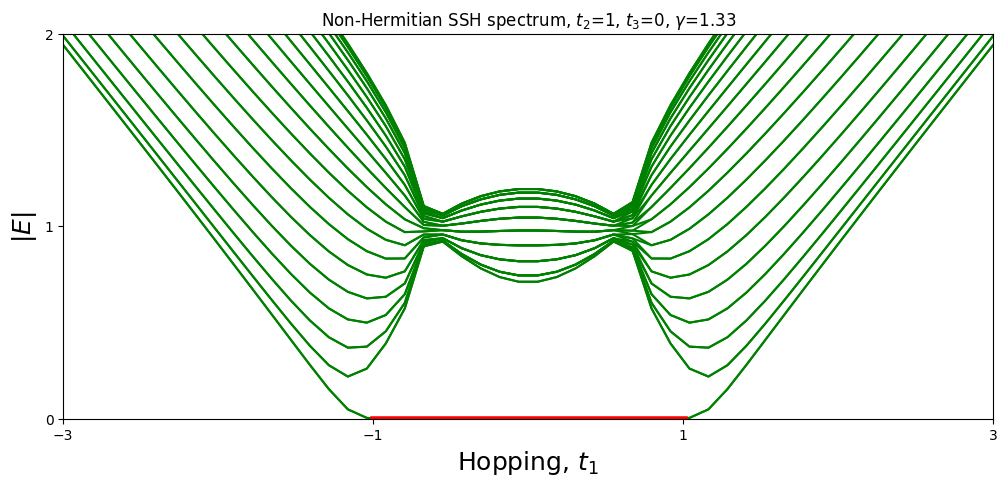

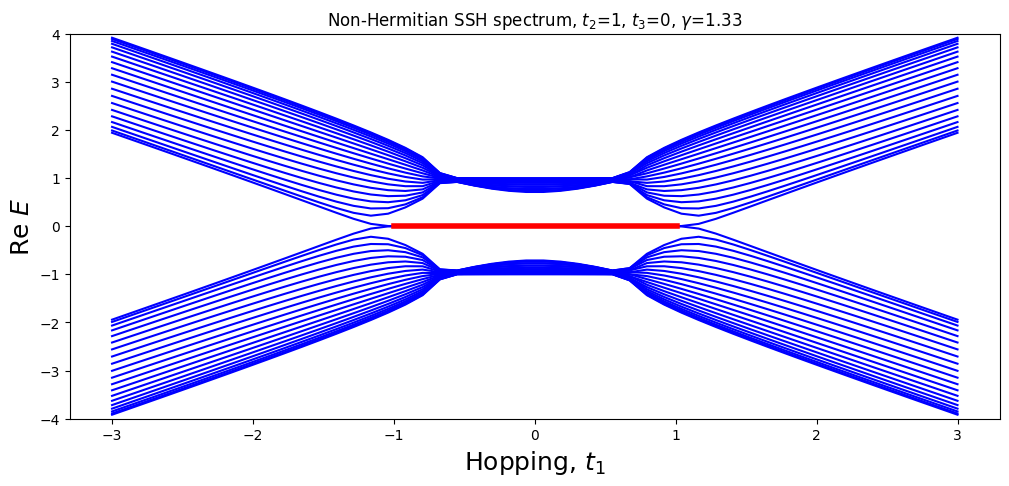

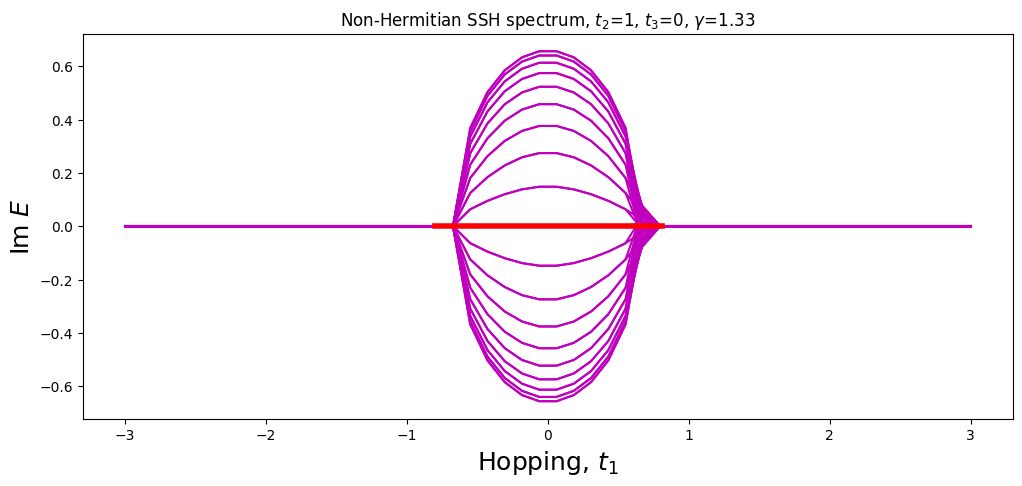

We see two bands approaching E=0, we call them edge bands.


In [5]:
#def plot_phase(L=100, n=50):
#def plot_phase(L=100, n=50):
#def plot_phase(n=50):


def plot_bands():
        npoint=50; llim=-3; ulim=3
        cdata = np.zeros((npoint,L), dtype=complex)
        absdata = np.zeros((npoint,L)) # Array of size npoint by L
                                 # For each delta-set, L eigenvalues
        redata = np.zeros((npoint,L))
        imdata = np.zeros((npoint,L))
        #d_val = linspace(-1,1,n, endpoint=True)
        d_val = np.linspace(llim,ulim,npoint, endpoint=True)
                                # Create delta array
                                  # ranging from llim to ulim
                                  # endpoint=True => last value is ulim
        for i, t1 in enumerate(d_val): # i is index for the array d_val
                                      # d is i-th value in d_val array
                H = H_SSH(L,t1,t2)
                #cdata[i,:], psi = np.linalg.eig(H) # eigenvalues of a Hermitian
                                                   #      matrix
                E, psi = np.linalg.eig(H)
                #cdata[i,:] = la.eigvals(H)

                ''' Sort eigenvalues '''
                idx = E.argsort()[::-1]
                E = E[idx]
                psi = psi[:,idx]
                cdata[i,:] = E
                absdata = abs(cdata)
                redata = cdata.real
                imdata = cdata.imag
                # All L eigenvalues are stored in row format
                        # for each i

        # Now plot eigenspectrum

        titlestr = "Non-Hermitian SSH spectrum, $t_2$={}, $t_3$={}, $\gamma$={}".format(t2,t3,g)
        titlestr = f"Non-Hermitian SSH spectrum, $t_2$={t2}, $t_3$={t3}, $\gamma$={g}"
        # Plot 0
        plt.figure(0,figsize=(12, 5))
        plt.ylim([0,2])
        plt.xlim([-3,3])
        plt.xticks(np.arange(-3, 4, 2.0))
        plt.yticks(np.arange(0, 2.1, 1))
        plt.title(f"Non-Hermitian SSH spectrum, $t_2$={t2}, $t_3$={t3}, $\gamma$={g}")
        plt.ylabel("|$E$|", size=lsz)
        plt.xlabel("Hopping, $t_1$", size=lsz)
        #n = i; print('n=',n,' npoint=',npoint)
        #print(d_val[10])

        plt.plot(d_val, absdata, 'g-')
        # Hightlight edge states in red
        x = np.linspace(-1,1.01,100)
        plt.plot(x,np.zeros(len(x)), 'r-', lw=4)


        # Plot 1
        plt.figure(1,figsize=(12, 5))
        plt.ylim([-4,4])
        plt.title(titlestr)
        plt.ylabel("Re $E$", size=lsz)
        plt.xlabel("Hopping, $t_1$", size=lsz)
        #plt.plot(d_val, redata, 'b-') #working
        plt.plot(d_val, redata, 'b-')
        x = np.linspace(-1,1.01,100)
        plt.plot(x,np.zeros(len(x)), 'r-', lw=4)

        # Plot 2
        plt.figure(2,figsize=(12, 5))
        plt.title(titlestr)
        plt.ylabel("Im $E$", size=18)
        plt.xlabel("Hopping, $t_1$", size=18)
        #plt.plot(d_val, redata, 'b-') #working
        plt.plot(d_val, imdata, 'm-')
        x = np.linspace(-0.8,0.81,100)
        plt.plot(x,np.zeros(len(x)), 'r-', lw=4)


        return

plot_bands()

print("L =",L," t2 =",t2, "t3 =",t3,'gamma =',g)
print('t1 is being varied')

plt.show()

print('We see two bands approaching E=0, we call them edge bands.')




# C. Plot eigenstates:

L = 40  t = 1  delta = 0.9
x= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] len(x)= 40
args= [[19]
 [20]]
i= 0  arg= [19] arg[0]= 19
i= 1  arg= [20] arg[0]= 20
E[19],E[20] -0.006740281623489261 0.0067402816252720215
Indices of edge states: [19, 20]
L = 40  t2 = 1 t3 = 0 gamma = 1.33
t1 is being varied


/var/folders/3m/pc44t30x60gd3bj_3f670_yw0000gn/T/ipykernel_43051/859310741.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(x, abs(psi[:,arg[0]]), '-', lw = count, label="E=%.4f"%E[arg])


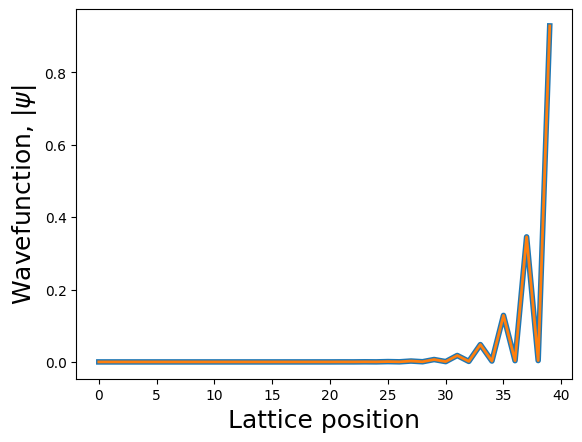

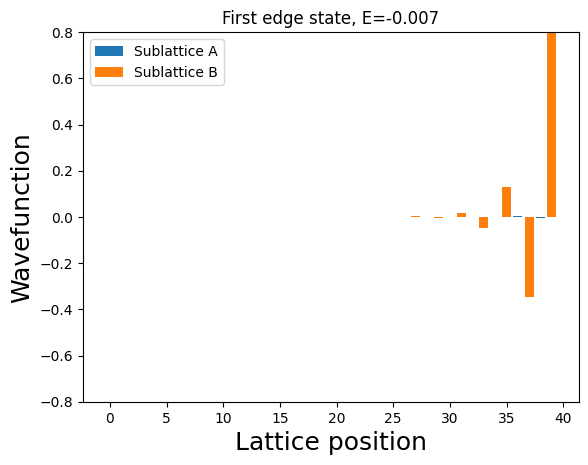

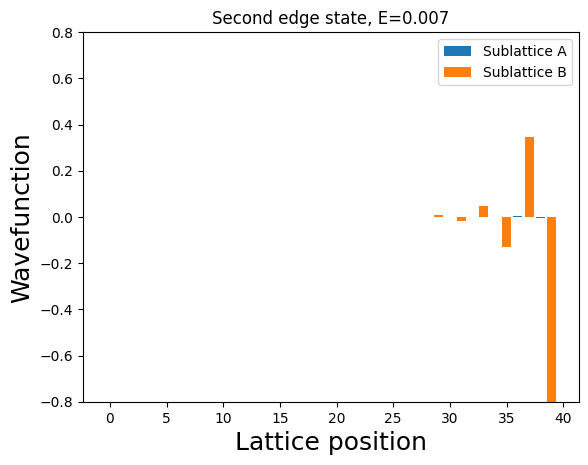

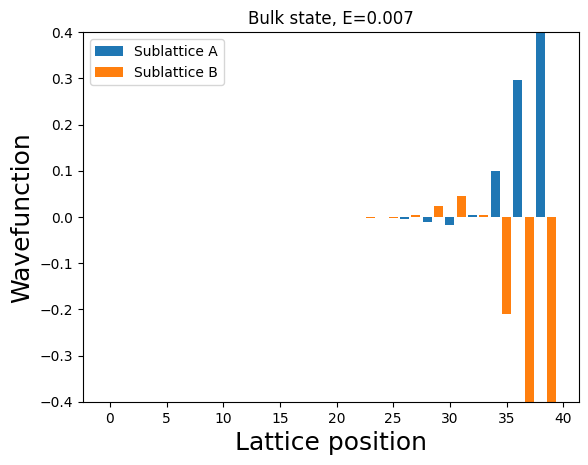

In [6]:

L = 40 # lattice size
t2 = 1 # hopping
t3 = 0


''' Plot the eigenstates'''
def plot_state():
        L=40; t=1; d=0.9; E0=0.0
        print("L =",L," t =",t," delta =",d)
        H = H_SSH(L,t,d)
        E, psi = eig(H) # eigenvalue and eigenfunction
        args = np.argwhere( abs(E-E0)<0.01 ) # argwhere ->
                       # finds the indices of array elements that
                       # satisfies condn: bs(E-E0)<0.001
                       # i.e. states at those indices are
                       # "Edge States"
        x = np.arange(L)+1 # creates an array with site indices
        x = np.arange(L) # creates an array with site indices
        print('x=',x, 'len(x)=',len(x))
        print('args=',args) # args is an array that stored
                            # indices of edge states


        plt.figure(0)
        i_edge = []; count = 4
        for i, arg in enumerate(args):
                print('i=',i,' arg=',arg,'arg[0]=',arg[0])
                i_edge.append(arg[0])
                plt.plot(x, abs(psi[:,arg[0]]), '-', lw = count, label="E=%.4f"%E[arg])
                plt.xlabel("Lattice position", size=lsz)
                plt.ylabel("Wavefunction, $|\psi|$", size=lsz)
                count /= 2
                # Note: argwhere creates an ndarray with shape (N, Narray)
                #   Narray: original array's dimension
                #   N: number of non-zero/True entries found by argwhere
                # That's why we need to use arg[0] to extract the indices only.
                # See the outputs of the print statement before for clarification.

        #plt.plot(x,psi[:,20], lw=2)
        #plt.plot(x,psi[:,19], lw=4)
        print("E[19],E[20]",E[19],E[20])
        print('Indices of edge states:',i_edge)


        #plt.scatter(x,psi[:,int(L/2)])
        #plt.plot(x,psi[:,int(L/2)-1])
        #plt.plot(x,psi[:,L-1])
        #plt.plot(x,psi[:,L-2])
        #plt.plot(x,psi[:,int(L/2)])
        #plt.plot(x,psi[:,int(L/2)+1])
        #plt.plot(x,psi[:,int(L/2)-1])
        #plt.plot(x,psi[:,0], lw=3)
        #plt.plot(x,psi[:,2], lw=4)



        #'''
        plt.figure(1)
        ind = i_edge[0]
        plt.title('First edge state, E={}'.format( round(E[ind],3) ) ) # round up to 3 decimals
        plt.bar(x[::2],psi[:,ind][::2],label="Sublattice A")
        plt.bar(x[1:][::2],psi[:,ind][1:][::2],label="Sublattice B")
        #plt.plot(x[::2],psi[:,10][::2],label="Sublattice A")
        #plt.plot(x[1:][::2],psi[:,10][1:][::2],label="Sublattice B")
        plt.ylim(-0.8,0.8)
        plt.xlabel("Lattice position", size=lsz)
        plt.ylabel("Wavefunction", size=lsz)
        plt.legend(loc='best')
        #
        plt.figure(2)
        ind = i_edge[1]
        plt.title('Second edge state, E={}'.format( round(E[ind],3) ) )
        plt.bar(x[::2],psi[:,ind][::2],label="Sublattice A")
        plt.bar(x[1:][::2],psi[:,ind][1:][::2],label="Sublattice B")
        plt.ylim(-0.8,0.8)
        plt.xlabel("Lattice position", size=lsz)
        plt.ylabel("Wavefunction", size=lsz)
        plt.legend(loc='best')
        #
        plt.figure(3)
        plt.title('Bulk state, E={}'.format( round(E[ind],3) ) )
        plt.bar(x[::2],psi[:,4][::2],label="Sublattice A")
        plt.bar(x[1:][::2],psi[:,5][1:][::2],label="Sublattice B")
        plt.ylim(-0.4,0.4)
        plt.xlabel("Lattice position", size=lsz)
        plt.ylabel("Wavefunction", size=lsz)
        plt.legend(loc='best')
        #'''

plot_state()
print("L =",L," t2 =",t2, "t3 =",t3,'gamma =',g)
print('t1 is being varied')

plt.show()